In [54]:
# %matplotlib ipympl

import numpy as np
import sympy as sy

import matplotlib.pyplot as plt
# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# import collections

In [55]:
def sym_n(sim, r=5):
    ls = []
    for i in range(2,r):
        ls.append(sy.symbols(sim+str(i)))
    return ls

In [56]:
t = sy.symbols('t')
t1 = 50*t+sy.pi/3
om=t1.diff(t)

theta = [0, t1]
# alpha = [sy.symbols(f'a_{ri}') for ri in range(8)]
F = []
M = sy.symbols('M')
# for ii in collections.combinations(list(range(1,5))):
#     st = ','.join(ii)
#     st_f =  f'F_({st},y)'
#     st_fx = f'F_({st},x)'
#     F.append(sy.symbols(st_fx))
#     F.append(sy.symbols(st_f))
# np.zeros((1, 8))

In [57]:
r_mat = np.array([0.5, 2.0, 9, 0])
b_mat=np.array([0.5, 2.0, 9, 0])
m_mat = np.array([0, 2.5, 10.0, 15])
phi_mat = np.array([0, 0, 5, 0])
ma_mat = np.array([m_mat[1], m_mat[1], 0, m_mat[3], m_mat[2], 80, m_mat[3], 0])

In [69]:
t2 =sy.asin((r_mat[1]*sy.sin(t1)-r_mat[0])/r_mat[2])
al=t2.diff(t)
theta.append(t2)
A33 = -(r_mat[1]*sy.sin(theta[1]))
A34=r_mat[1]*sy.cos(theta[1])
A63 = sy.sin(theta[2])-b_mat[2]*sy.sin(theta[2]+phi_mat[2])
A64 = sy.cos(theta[2])-b_mat[2]*sy.cos(theta[2]+phi_mat[2])
A65 = sy.sin(theta[2]+phi_mat[2])
A66 = -sy.cos(theta[2]+phi_mat[2])
for iii in [A33, A34, A63, A64, A65, A66]:
    print(sy.latex(iii))

- 2.0 \sin{\left(50 t + \frac{\pi}{3} \right)}
2.0 \cos{\left(50 t + \frac{\pi}{3} \right)}
0.222222222222222 \sin{\left(50 t + \frac{\pi}{3} \right)} - 9.0 \sin{\left(\operatorname{asin}{\left(0.222222222222222 \sin{\left(50 t + \frac{\pi}{3} \right)} - 0.0555555555555556 \right)} + 5 \right)} - 0.0555555555555556
\sqrt{1 - 0.0493827160493827 \left(\sin{\left(50 t + \frac{\pi}{3} \right)} - 0.25\right)^{2}} - 9.0 \cos{\left(\operatorname{asin}{\left(0.222222222222222 \sin{\left(50 t + \frac{\pi}{3} \right)} - 0.0555555555555556 \right)} + 5 \right)}
\sin{\left(\operatorname{asin}{\left(0.222222222222222 \sin{\left(50 t + \frac{\pi}{3} \right)} - 0.0555555555555556 \right)} + 5 \right)}
- \cos{\left(\operatorname{asin}{\left(0.222222222222222 \sin{\left(50 t + \frac{\pi}{3} \right)} - 0.0555555555555556 \right)} + 5 \right)}


In [59]:
co=sy.zeros(8,8)

co[2,7] = 1

In [60]:
def rep_np(m,li,ji=1):
    for i in li:
        m[i[0],i[1]] = ji

In [61]:

rep_np(co,[[0,0],[0,2],[1,1], [1,3],[3,4],[7,6],[7,5]])
rep_np(co,[[3,2],[4,3],[4,5],[6,4]],-1)
print(sy.latex(co))
co[5,2] = A63
co[5,3] = A64
co[5,4] = A65
co[5,5] = A66
co[2,3] = A34
co[2,2] = A33
print(sy.latex(co))

\left[\begin{matrix}1 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\0 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\0 & 0 & -1 & 0 & 1 & 0 & 0 & 0\\0 & 0 & 0 & -1 & 0 & -1 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & -1 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 1 & 1 & 0\end{matrix}\right]
\left[\begin{matrix}1 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\0 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\0 & 0 & - 2.0 \sin{\left(50 t + \frac{\pi}{3} \right)} & 2.0 \cos{\left(50 t + \frac{\pi}{3} \right)} & 0 & 0 & 0 & 1\\0 & 0 & -1 & 0 & 1 & 0 & 0 & 0\\0 & 0 & 0 & -1 & 0 & -1 & 0 & 0\\0 & 0 & 0.222222222222222 \sin{\left(50 t + \frac{\pi}{3} \right)} - 9.0 \sin{\left(\operatorname{asin}{\left(0.222222222222222 \sin{\left(50 t + \frac{\pi}{3} \right)} - 0.0555555555555556 \right)} + 5 \right)} - 0.0555555555555556 & \sqrt{1 - 0.0493827160493827 \left(\sin{\left(50 t + \frac{\pi}{3} \right)} - 0.25\right)^{2}} - 9.0 \cos{\left(\operatorname{asin}{\left(0.222222222222222 \sin{\left(50 t + \frac{\pi}{3} \right)} - 0.05555555

In [62]:
r1x = b_mat[1]*sy.cos(theta[1]+phi_mat[1])
r1y = b_mat[1]*sy.sin(theta[1]+phi_mat[1])
r1_x = r_mat[1]*sy.cos(theta[1])
r1_y = r_mat[1]*sy.sin(theta[1])

r2y = sy.sin(theta[2])-b_mat[2]*sy.sin(theta[2]+phi_mat[2])+r1_y
r2x = sy.cos(theta[2])-b_mat[2]*sy.cos(theta[2]+phi_mat[2])+r1_x
r2_x = sy.cos(theta[2])+r1_x
r2_y = sy.sin(theta[2])+r1_y

alpha = [sy.diff(x,t) for x in [r1x, r1y, r2x, r2y, r2_x]]
alpha.insert(2,0)
alpha.insert(5,al)
alpha.insert(7,0)

In [63]:
ma=sy.Matrix(np.multiply(ma_mat,np.array(alpha)).transpose())
print(sy.latex(ma))

\left[\begin{matrix}- 250.0 \sin{\left(50 t + \frac{\pi}{3} \right)}\\250.0 \cos{\left(50 t + \frac{\pi}{3} \right)}\\0.0\\- 1500.0 \sin{\left(50 t + \frac{\pi}{3} \right)} - \frac{37.037037037037 \left(\sin{\left(50 t + \frac{\pi}{3} \right)} - 0.25\right) \cos{\left(50 t + \frac{\pi}{3} \right)}}{\sqrt{1 - 0.0493827160493827 \left(\sin{\left(50 t + \frac{\pi}{3} \right)} - 0.25\right)^{2}}} + \frac{1500.0 \sin{\left(\operatorname{asin}{\left(0.222222222222222 \sin{\left(50 t + \frac{\pi}{3} \right)} - 0.0555555555555556 \right)} + 5 \right)} \cos{\left(50 t + \frac{\pi}{3} \right)}}{\sqrt{1 - 0.0493827160493827 \left(\sin{\left(50 t + \frac{\pi}{3} \right)} - 0.25\right)^{2}}}\\1111.11111111111 \cos{\left(50 t + \frac{\pi}{3} \right)} - \frac{1000.0 \cos{\left(50 t + \frac{\pi}{3} \right)} \cos{\left(\operatorname{asin}{\left(0.222222222222222 \sin{\left(50 t + \frac{\pi}{3} \right)} - 0.0555555555555556 \right)} + 5 \right)}}{\sqrt{1 - 0.0493827160493827 \left(\sin{\left(50 t + \fra

In [64]:
si = co.LUsolve(ma)
print(sy.latex(si))

\left[\begin{matrix}- 3250.0 \sin{\left(50 t + \frac{\pi}{3} \right)} - \frac{74.0740740740741 \left(\sin{\left(50 t + \frac{\pi}{3} \right)} - 0.25\right) \cos{\left(50 t + \frac{\pi}{3} \right)}}{\sqrt{1 - 0.0493827160493827 \left(\sin{\left(50 t + \frac{\pi}{3} \right)} - 0.25\right)^{2}}} + \frac{1500.0 \sin{\left(\operatorname{asin}{\left(0.222222222222222 \sin{\left(50 t + \frac{\pi}{3} \right)} - 0.0555555555555556 \right)} + 5 \right)} \cos{\left(50 t + \frac{\pi}{3} \right)}}{\sqrt{1 - 0.0493827160493827 \left(\sin{\left(50 t + \frac{\pi}{3} \right)} - 0.25\right)^{2}}}\\- \frac{0.5 \left(- 2.0 \left(- 1500.0 \sin{\left(50 t + \frac{\pi}{3} \right)} - \frac{37.037037037037 \left(\sin{\left(50 t + \frac{\pi}{3} \right)} - 0.25\right) \cos{\left(50 t + \frac{\pi}{3} \right)}}{\sqrt{1 - 0.0493827160493827 \left(\sin{\left(50 t + \frac{\pi}{3} \right)} - 0.25\right)^{2}}}\right) \sin{\left(50 t + \frac{\pi}{3} \right)} + 2.0 \left(1111.11111111111 \cos{\left(50 t + \frac{\pi}{3} \

In [65]:
ti = np.linspace(0,10)
F_sx = []
F_sy = []
for tii in ti:
    F_sx.append(float(sy.N(si[0].subs(t,tii))))
    f_sy = si[6]+si[1]
    F_sy.append(float(sy.N(f_sy.subs(t,tii))))
F_sx = np.array(F_sx)
F_sy = np.array(F_sy)
F_s = np.sqrt(F_sx**2+F_sy**2)
aii = np.arctan(np.divide(F_sx, F_sy))
print(aii)

[-1.43764768  1.44859586  0.45232778 -1.12282311 -1.37869425  1.49648408
  0.43794096 -1.07395394 -1.4249423   1.47479456  0.61678452 -1.08842472
 -1.36343701  1.51405523  0.57335768 -1.04384789 -1.41189304  1.49942824
  0.76004562 -1.05028614 -1.3482146   1.53044046  0.69483676 -1.01032347
 -1.39842938  1.52269737  0.88150683 -1.00773569 -1.33296382  1.54583357
  0.80208353 -0.97261389 -1.38447691  1.54477218  0.98319271 -0.95995817
 -1.31761726  1.56040049  0.89600358 -0.92974998 -1.36995605  1.56579842
  1.06810857 -0.9059678  -1.3021021  -1.56730781  0.97808094 -0.88050094
 -1.35478045 -1.5556908 ]


array([3558.90830647, 2794.81025895,  976.89054531, 2418.3825752 ,
       3601.8812821 , 2844.94495351, 1166.04855042, 2411.45808355,
       3542.09050068, 2893.04723172, 1035.61522133, 2304.22105897,
       3586.20488764, 2942.33343615, 1225.98434004, 2287.42973985,
       3517.60985292, 2986.27342262, 1117.02716162, 2187.76522424,
       3562.61100753, 3033.56428364, 1302.72036106, 2160.13884046,
       3485.57052436, 3074.11867945, 1215.8230618 , 2069.79025014,
       3531.13282886, 3118.3381087 , 1392.87375514, 2030.34643093,
       3446.0996609 , 3156.24406873, 1327.229049  , 1951.20022199,
       3491.82955493, 3196.3896607 , 1493.30440575, 1898.95269107,
       3399.3475126 , 3232.33882404, 1447.33242791, 1833.06369243,
       3444.78692885, 3267.4853097 , 1601.28695376, 1767.0423268 ,
       3345.48767986, 3302.11815234])

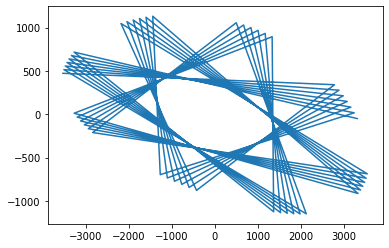

In [66]:
plt.plot(F_sx,F_sy)
F_s

In [67]:
plt.show()